In [16]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from data_split import split_data

## MLPClassifier tests with separate datasets

In [ ]:
row_test_percentage = 5
files = ['home_lab(L)', 'home_lab(R)', 'meeting_room', 'lecture_room', 'living_room']

# Generate separate data (each file represents a different dataset)
data = {
    'CSI': {},
    'labels': {}
}

for f in files:
    _ = sio.loadmat(f'data/dataset_{f}.mat')
    data['CSI'][f] = _.get('dataset_CSI').mean(2)
    data['labels'][f] = _.get('dataset_labels').ravel()

# Group each dataset together
full_data = {
    'CSI': np.concatenate([data['CSI'][f] for f in files]),
    'labels': np.concatenate([data['labels'][f] for f in files])
}

print(f'Size data : {[data['CSI'][_].shape for _ in data['CSI']]}')
print(f'Size full_data : {full_data['CSI'].shape}')

Size data : [(85, 625), (85, 625), (134, 625), (205, 625), (248, 625)]
Size full_data : (757, 625)


### Test the model with same test batch as train batch

Train and test of the model : -----------
########################################

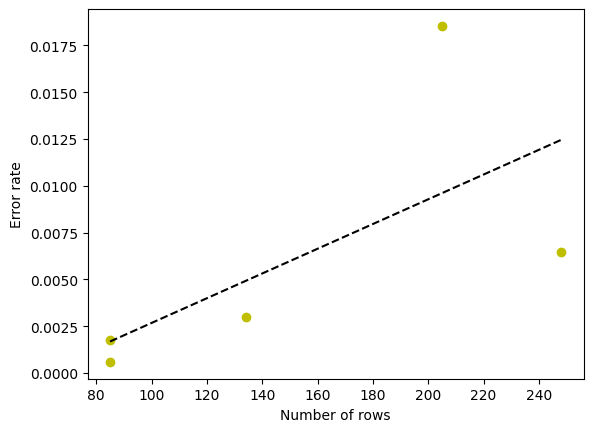

In [30]:
num_iter = 20
results_model_reset = [[], [], [], [], []]

print('Train and test of the model : -----------')
for i in range(num_iter):
    print('##', end = '')
    # print('Error rates :', end = ' ')
    for f in range(len(files)):
        file = files[f]
        # Data 
        X = data['CSI'].get(file)
        y = data['labels'].get(file)

        # Make modeel and pipeline
        model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (20, 7), max_iter = 1500)
        clf = make_pipeline(StandardScaler(), model)
        clf.fit(X, y)

        # Test the pipeline
        predict = clf.predict(X)
        diff = predict != y
        error = np.sum(diff)
        error_rate = error / X.shape[0]

        results_model_reset[f].append(error_rate)
        # print(error_rate, end = ' ')
    # print()

# Plot results
results = np.matrix(results_model_reset)
_ = results.mean(1).T.tolist()[0]
x = [data['CSI'][_].shape[0] for _ in data['CSI']]

coef = np.polyfit(x, _, 1)


plt.plot(x, _, 'yo', x, np.poly1d(coef)(x), '--k')
plt.xlabel('Number of rows')
plt.ylabel('Error rate')
plt.show()

### Test the model sith separate data and splitted data (model no retrained)

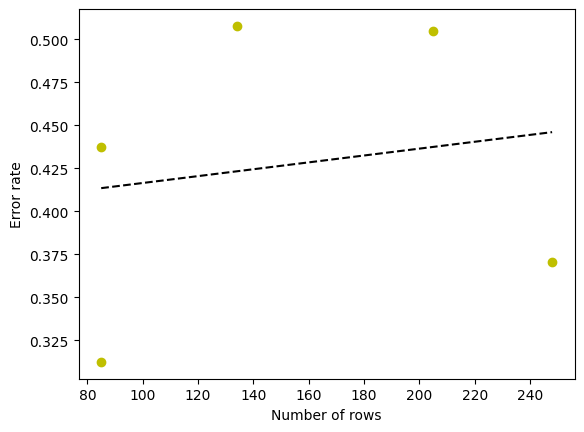

In [31]:
num_iter = 10
results_split_data = [[], [], [], [], []]

for i in range(num_iter):
    for f in range(len(files)):
        file = files[f]

        # Split the data
        X = data['CSI'].get(file)
        y = data['labels'].get(file)
        

        _rows = [_ for _ in range(X.shape[0])]
        np.random.shuffle(_rows)
        _num_rows_percentage = 10
        _num_rows = int(_num_rows_percentage * X.shape[0] / 100)

        _X = X[_rows]
        _y = y[_rows]

        X_train = _X[_num_rows:, :]
        y_train = _y[_num_rows:]
        X_test = _X[:_num_rows, :]
        y_test = _y[:_num_rows]

        # Make modeel and pipeline
        model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (20, 7), max_iter = 1500)
        clf = make_pipeline(StandardScaler(), model)
        clf.fit(X_train, y_train)

        # Test the pipeline
        predict = clf.predict(X_test)
        diff = predict != y_test
        error = np.sum(diff)
        error_rate = error / X_test.shape[0]

        results_split_data[f].append(error_rate)

# Plot results
results = np.matrix(results_split_data)
_ = results.mean(1).T.tolist()[0]
x = [data['CSI'][_].shape[0] for _ in data['CSI']]

coef = np.polyfit(x, _, 1)

plt.plot(x, _, 'yo', x, np.poly1d(coef)(x), '--k')
plt.xlabel('Number of rows')
plt.ylabel('Error rate')
plt.show()

### Reuse the model after the test

c:\Users\gries\OneDrive\Documents\Dev\Human-Activity-Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 80 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


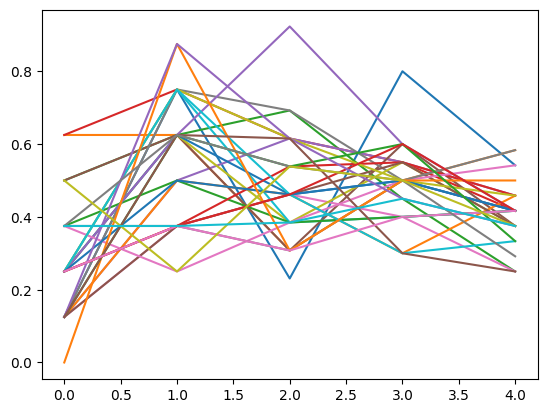

In [36]:
num_iter = 30
results_model_retrain = [[], [], [], [], []]

for f in range(len(files)):
    file = files[f]

    # Split the data
    X = data['CSI'].get(file)
    y = data['labels'].get(file)
    _rows = [_ for _ in range(X.shape[0])]

    model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (20, 7), max_iter = 1500)
    clf = make_pipeline(StandardScaler(), model)

    for i in range(num_iter):
        
        np.random.shuffle(_rows)
        _num_rows_percentage = 10
        _num_rows = int(_num_rows_percentage * X.shape[0] / 100)

        _X = X[_rows]
        _y = y[_rows]

        X_train = _X[_num_rows:, :]
        y_train = _y[_num_rows:]
        X_test = _X[:_num_rows, :]
        y_test = _y[:_num_rows]

        # Train the model
        clf.fit(X_train, y_train)

        # Test the pipeline
        predict = clf.predict(X_test)
        diff = predict != y_test
        error = np.sum(diff)
        error_rate = error / X_test.shape[0]

        results_model_retrain[f].append(error_rate)

# Plot results
# results = np.matrix(results_model_reset)
# _ = results.mean(1).T.tolist()[0]
# x = [data['CSI'][_].shape[0] for _ in data['CSI']]

# coef = np.polyfit(x, _, 1)

# plt.plot(x, _, 'yo', x)
# plt.xlabel('Number of rows')
# plt.ylabel('Error rate')
# plt.show()

plt.plot(results_model_retrain)
plt.show()

## Group all datasets 

In [8]:
full_data = np.concatenate([data['CSI'][f] for f in files]).mean(2)
full_labels = np.concatenate([data['labels'][f] for f in files])

In [20]:
num_iter = 10
results = []

for i in range(num_iter):
    # Split the data
    rows = [_ for _ in range(full_data.shape[0])]
    np.random.shuffle(rows)
    shuffled_data = full_data[rows]
    shuffled_labels = full_labels[rows].ravel()

    test_rows_count = int(full_data.shape[0] * 0.1)

    X_train = shuffled_data[:test_rows_count, :]
    y_train = shuffled_labels[:test_rows_count]

    X_test = shuffled_data[test_rows_count:, :]
    y_test = shuffled_labels[test_rows_count:]

    # Create and train the model
    model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (500, 150), max_iter = 1500)
    model.fit(X_train, y_train)

    # Test the model
    prediction = model.predict(X_test)
    diff = prediction != y_test
    error = np.sum(diff)
    error_rate = error / X_test.shape[0]

    print(f'Error rate: {error_rate}')
    results.append(error_rate)

print(np.array(results).mean())

Error rate: 0.4780058651026393


KeyboardInterrupt: 